In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# import the dataset files
from google.colab import drive
drive.mount('/content/gdrive/')

# change directory to the Train folder
curr_path = '/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/Image_Classification/German_Traffic_Signs_Image_Classification/Train'
os.chdir(curr_path)

Mounted at /content/gdrive/


In [ ]:
data = []
labels = []

Dataset Link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data

In [ ]:
# used to read images from files
from PIL import Image


num_classes = 43

# access each of the 43 subdirectories
for i in range(num_classes):
  path = os.path.join(curr_path, str(i))
  images = os.listdir(path)
  # access each picture within each subdirectory
  for pic in images:
    try:
      image = Image.open(path + "/" + pic)
      resize_image = image.resize((30, 30))
      numpy_image = np.array(resize_image)
      data.append(numpy_image)
      labels.append(i)
    except Exception as e:
      print(e)
  print("Retrieved data from class",i)

Retrieved data from class 0
Retrieved data from class 1
Retrieved data from class 2
Retrieved data from class 3
Retrieved data from class 4
Retrieved data from class 5
Retrieved data from class 6
Retrieved data from class 7
Retrieved data from class 8
Retrieved data from class 9
Retrieved data from class 10
Retrieved data from class 11
Retrieved data from class 12
Retrieved data from class 13
Retrieved data from class 14
Retrieved data from class 15
Retrieved data from class 16
Retrieved data from class 17
Retrieved data from class 18
Retrieved data from class 19
Retrieved data from class 20
Retrieved data from class 21
Retrieved data from class 22
Retrieved data from class 23
Retrieved data from class 24
Retrieved data from class 25
Retrieved data from class 26
Retrieved data from class 27
Retrieved data from class 28
Retrieved data from class 29
Retrieved data from class 30
Retrieved data from class 31
Retrieved data from class 32
Retrieved data from class 33
Retrieved data from clas

In [ ]:
# convert data and labels arrays to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# save the data and labels arrays
np.save('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/Image_Classification/German_Traffic_Signs_Image_Classification/training/data.npy', data)
np.save('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/Image_Classification/German_Traffic_Signs_Image_Classification/training/labels.npy', labels)

In [ ]:
# load the data and labels array
data = np.load('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/Image_Classification/German_Traffic_Signs_Image_Classification/training/data.npy')
labels = np.load('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/Image_Classification/German_Traffic_Signs_Image_Classification/training/labels.npy')

In [ ]:
print(data.shape, labels.shape)
print(data.size, labels.size)

(39519, 30, 30, 3) (39519,)
106701300 39519


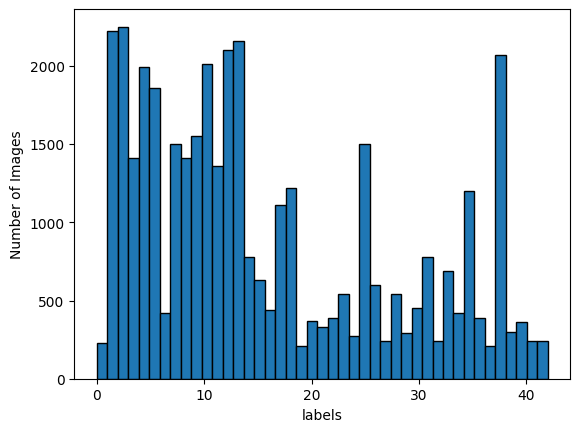

In [ ]:
# show a histogram for the labels numpy array
plt.hist(labels, bins=43, ec="black")
plt.xlabel("labels")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
# used to split the training data into train and test files
from sklearn.model_selection import train_test_split

# use 20% of files for testing, and 80% for training
# will shuffle the data by default
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (31615, 30, 30, 3)
y_train shape: (31615,)
x_test shape: (7904, 30, 30, 3)
y_test shape: (7904,)


In [ ]:
from keras.utils import to_categorical

# Convert the image arrays to binary matrices (one hot encoding)
  # One hot encoding associates categorical data with a number instead
  # In this case, we are associating the name of the sign with a number from 1-43 (since we have 43 classes)
y_train_enc = to_categorical(y_train, 43)
y_test_enc = to_categorical(y_test, 43)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


model = Sequential([
    # uses a 5x5 matrix to analyze the overlap on the image
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.2),
    # uses a 3x3 matrix to analyze the overlap on the image
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=900, activation='relu'),
    Dropout(rate=0.5),
    # use 43 units because there are 43 classes in the German Traffic Signals Dataset
    Dense(units=43, activation='softmax')
])

In [ ]:
# use adam optimizer because it is faster than sgd and because we are using a much larger dataset than the mnist digit dataset
# adam optimizer uses more compute resources than sgd, but it yields faster results and works better with large databases
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
model.fit(
    x_train,
    y_train_enc,
    epochs=20,
    # uses the test data to measure the accuracy of the weights calculated form the train data
    validation_data=(x_test, y_test_enc)
)

Epoch 1/20
988/988 [==============================] - 153s 153ms/step - loss: 1.3556 - accuracy: 0.6581 - val_loss: 0.2849 - val_accuracy: 0.9290
Epoch 2/20
988/988 [==============================] - 142s 144ms/step - loss: 0.4140 - accuracy: 0.8844 - val_loss: 0.1234 - val_accuracy: 0.9660
Epoch 3/20
988/988 [==============================] - 146s 148ms/step - loss: 0.2900 - accuracy: 0.9201 - val_loss: 0.0725 - val_accuracy: 0.9819
Epoch 4/20
988/988 [==============================] - 141s 143ms/step - loss: 0.2437 - accuracy: 0.9325 - val_loss: 0.1169 - val_accuracy: 0.9658
Epoch 5/20
988/988 [==============================] - 145s 146ms/step - loss: 0.2451 - accuracy: 0.9364 - val_loss: 0.0896 - val_accuracy: 0.9744
Epoch 6/20
988/988 [==============================] - 144s 146ms/step - loss: 0.2346 - accuracy: 0.9404 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 7/20
988/988 [==============================] - 141s 142ms/step - loss: 0.2236 - accuracy: 0.9433 - val_loss: 0.0420 -

In [ ]:
# predict the class for each image in the test set
y_test_prediction = model.predict(x_test)
y_test_prediction = np.argmax(y_test_prediction, axis=1)
y_test_enc = np.argmax(y_test_enc, axis=1)

247/247 [==============================] - 8s 31ms/step


In [ ]:
print(y_test_prediction.shape)
print(y_test_enc.shape)

(7904,)
(7904,)


A total of 3 images in the class 13 were incorrectly classified.
The following images should have been classified with the label: 13
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 36


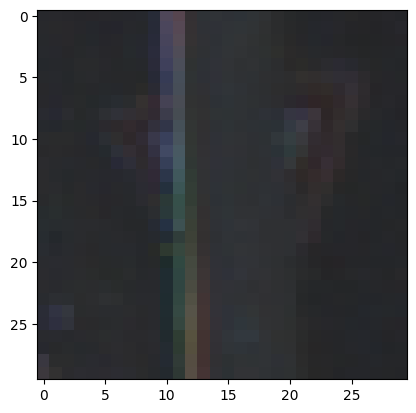



Image was incorrectly classified with the label: 3


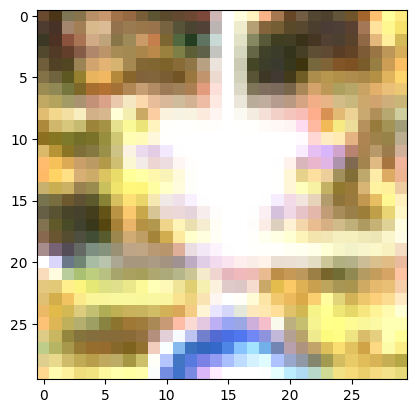



Image was incorrectly classified with the label: 25


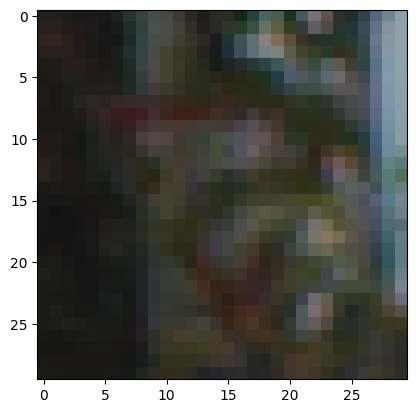





A total of 1 images in the class 21 were incorrectly classified.
The following images should have been classified with the label: 21
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 25


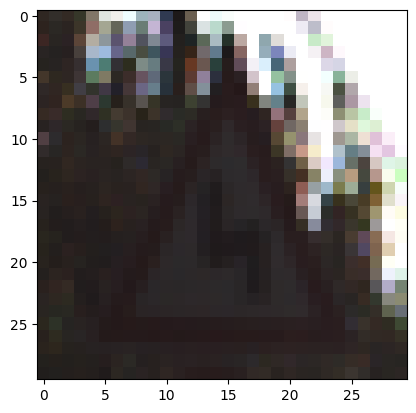





A total of 12 images in the class 8 were incorrectly classified.
The following images should have been classified with the label: 8
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 2


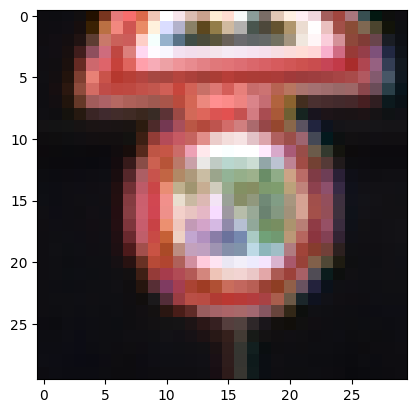



Image was incorrectly classified with the label: 7


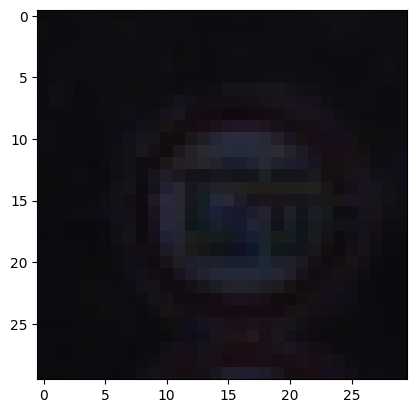



Image was incorrectly classified with the label: 7


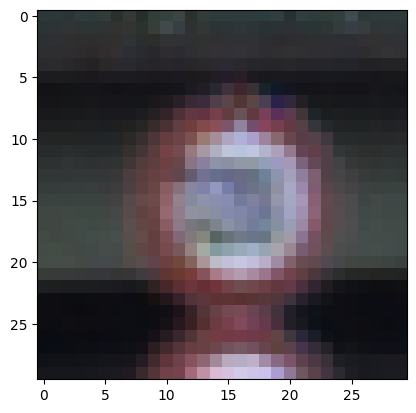



Image was incorrectly classified with the label: 4


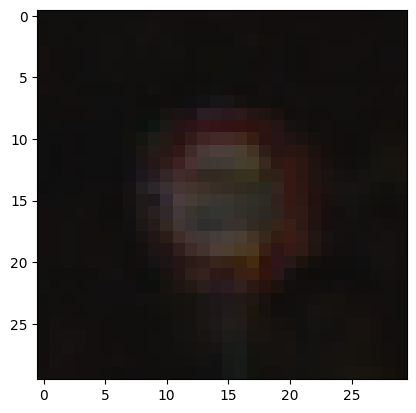



Image was incorrectly classified with the label: 38


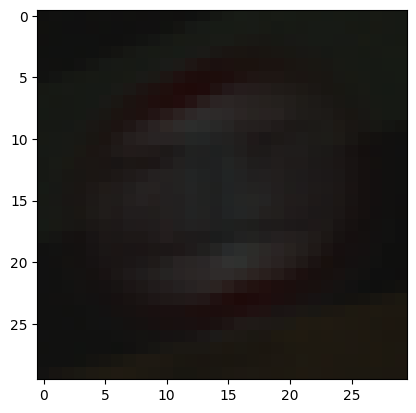



Image was incorrectly classified with the label: 7


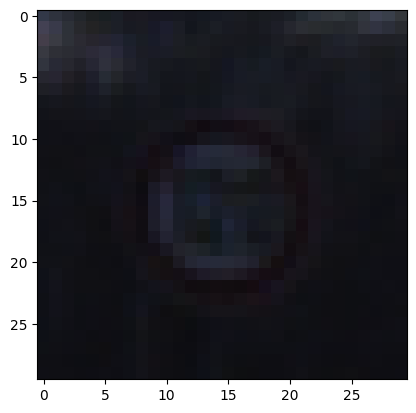



Image was incorrectly classified with the label: 32


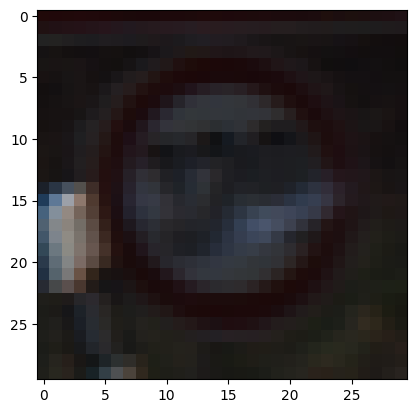



Image was incorrectly classified with the label: 5


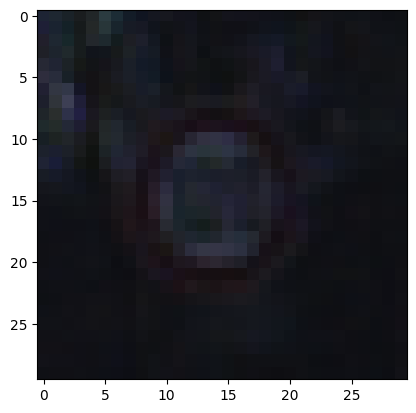



Image was incorrectly classified with the label: 1


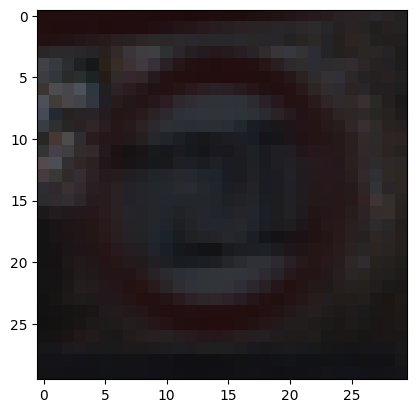



Image was incorrectly classified with the label: 7


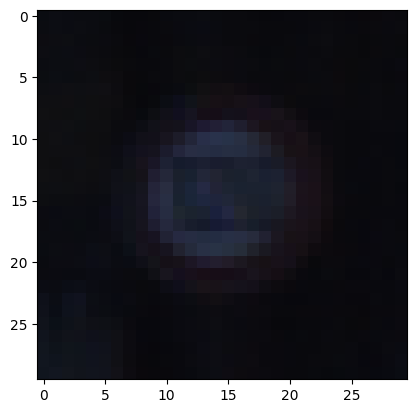



Image was incorrectly classified with the label: 7


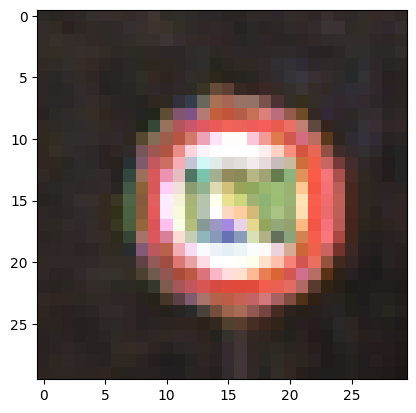



Image was incorrectly classified with the label: 5


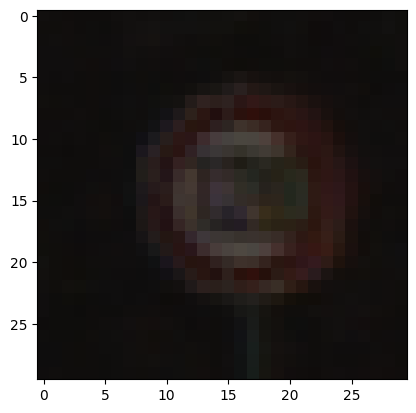





A total of 6 images in the class 5 were incorrectly classified.
The following images should have been classified with the label: 5
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 7


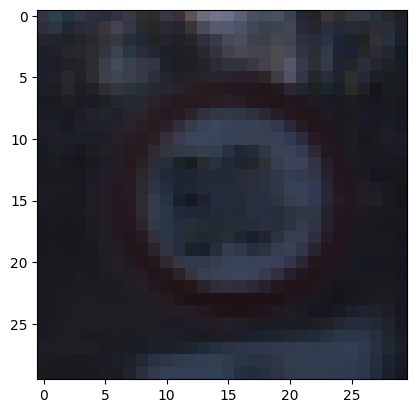



Image was incorrectly classified with the label: 7


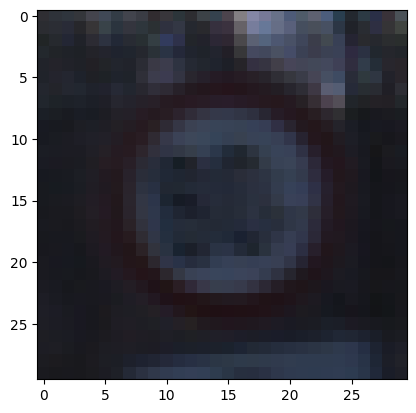



Image was incorrectly classified with the label: 7


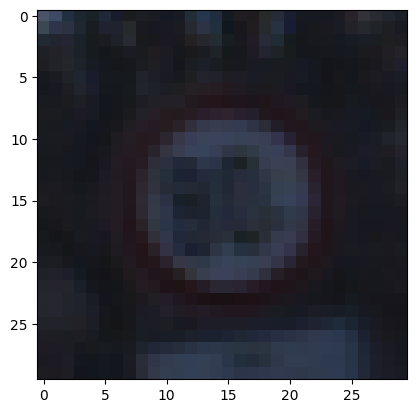



Image was incorrectly classified with the label: 7


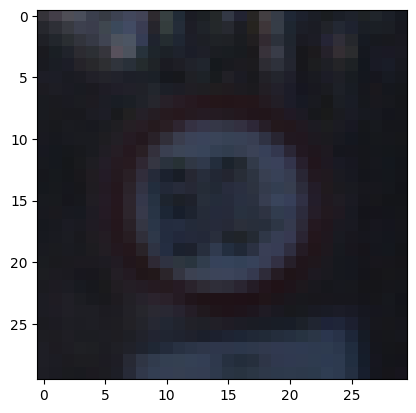



Image was incorrectly classified with the label: 8


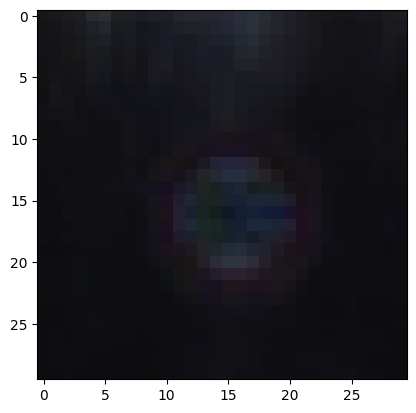



Image was incorrectly classified with the label: 3


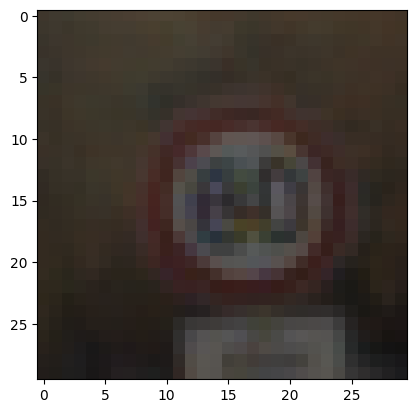





A total of 1 images in the class 39 were incorrectly classified.
The following images should have been classified with the label: 39
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 33


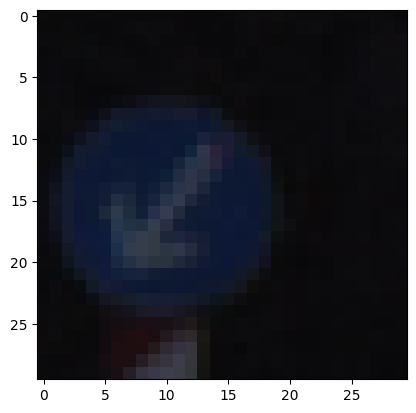





A total of 8 images in the class 18 were incorrectly classified.
The following images should have been classified with the label: 18
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 26


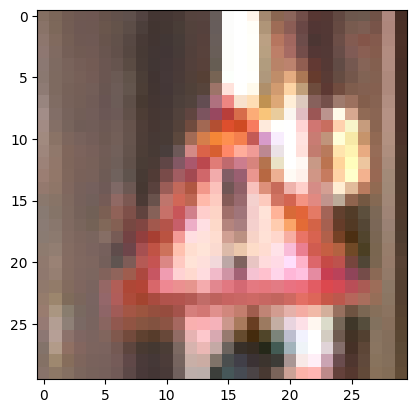



Image was incorrectly classified with the label: 26


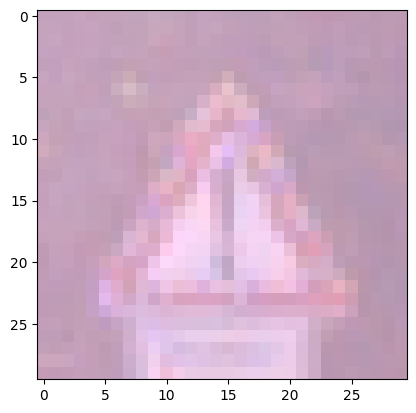



Image was incorrectly classified with the label: 11


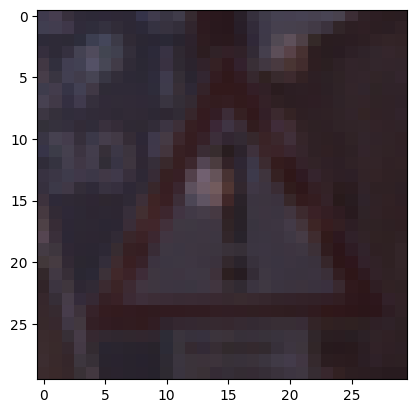



Image was incorrectly classified with the label: 26


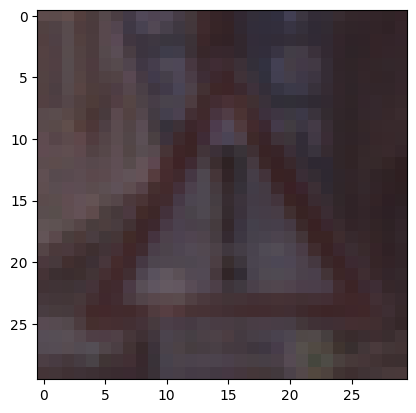



Image was incorrectly classified with the label: 26


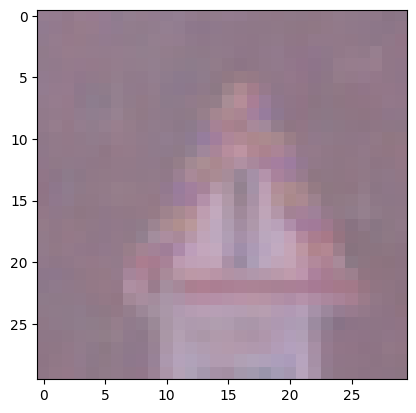



Image was incorrectly classified with the label: 20


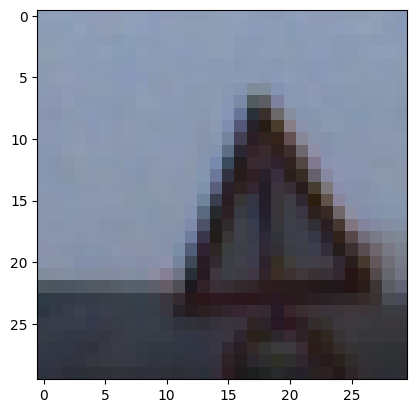



Image was incorrectly classified with the label: 26


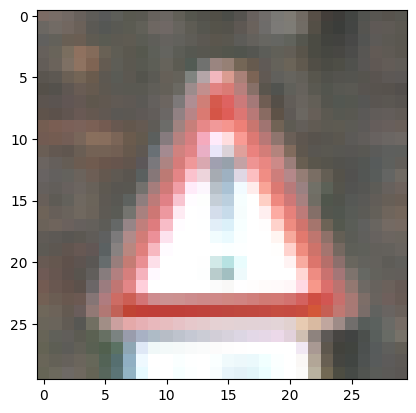



Image was incorrectly classified with the label: 26


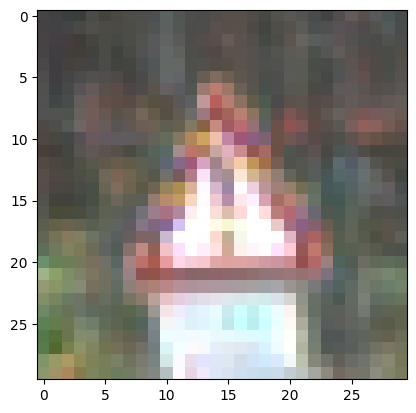





A total of 3 images in the class 1 were incorrectly classified.
The following images should have been classified with the label: 1
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 4


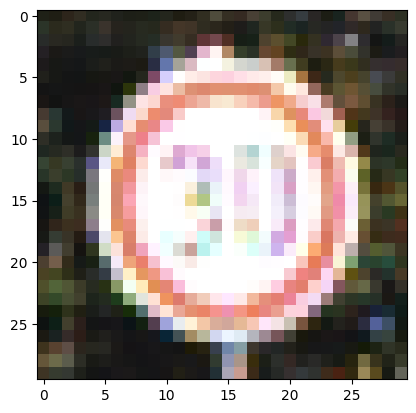



Image was incorrectly classified with the label: 4


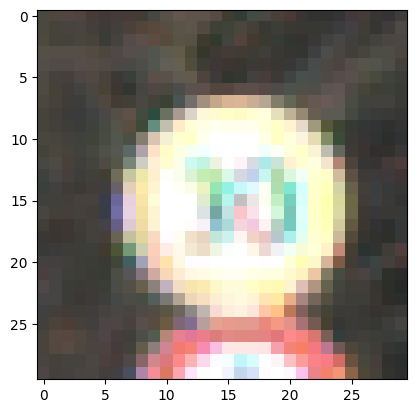



Image was incorrectly classified with the label: 4


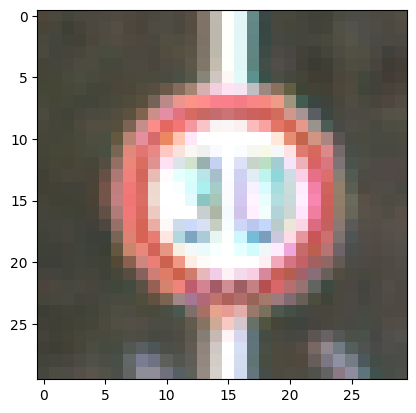





A total of 3 images in the class 38 were incorrectly classified.
The following images should have been classified with the label: 38
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 8


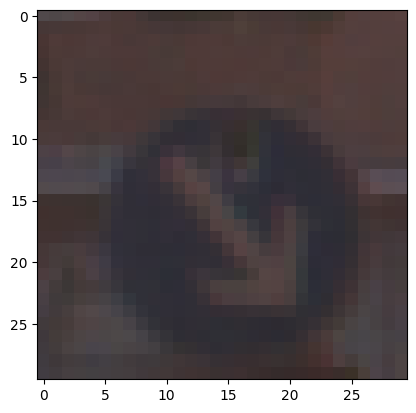



Image was incorrectly classified with the label: 4


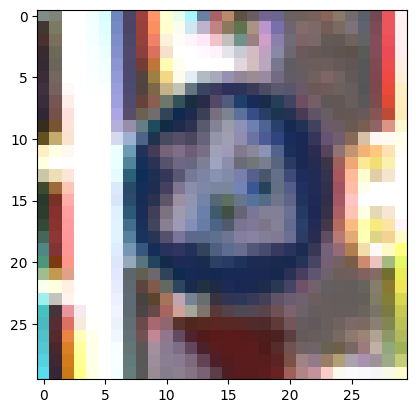



Image was incorrectly classified with the label: 8


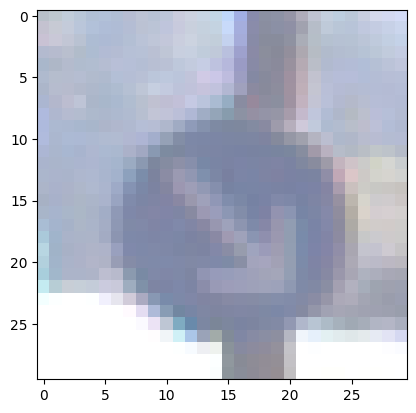





A total of 1 images in the class 10 were incorrectly classified.
The following images should have been classified with the label: 10
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 42


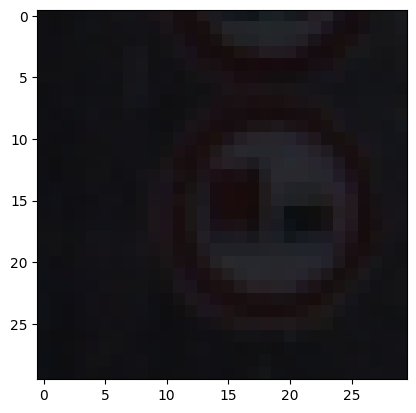





A total of 6 images in the class 30 were incorrectly classified.
The following images should have been classified with the label: 30
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 11


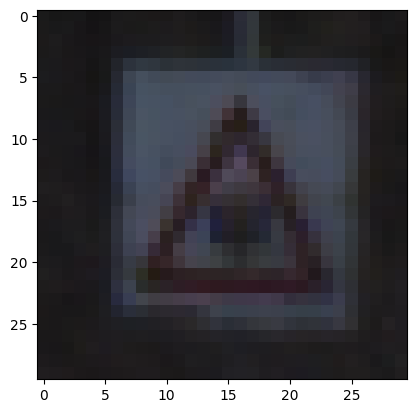



Image was incorrectly classified with the label: 20


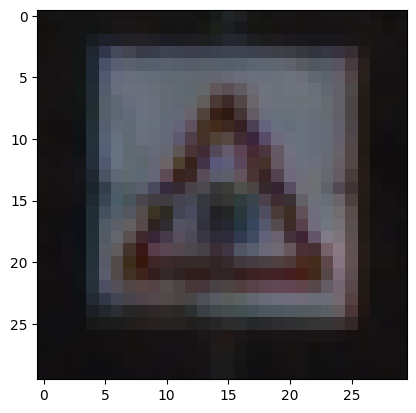



Image was incorrectly classified with the label: 11


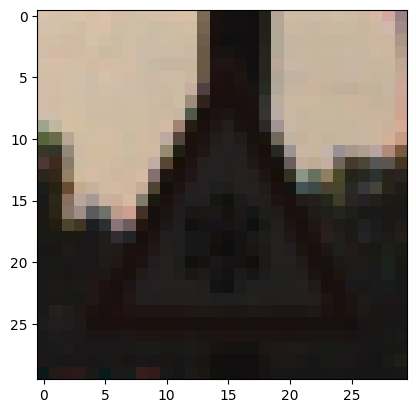



Image was incorrectly classified with the label: 11


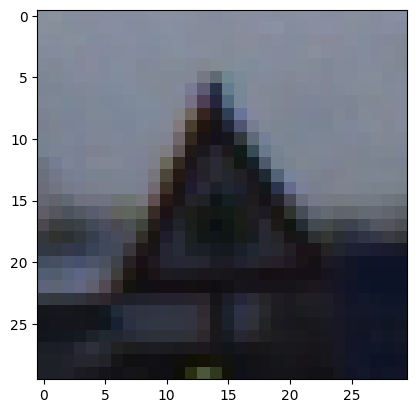



Image was incorrectly classified with the label: 11


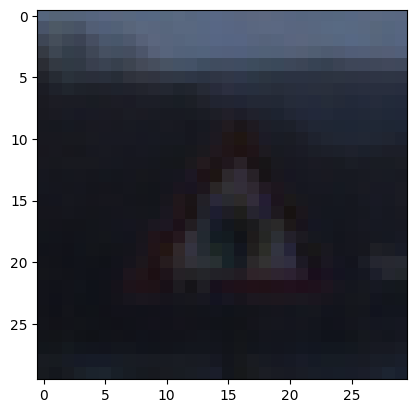



Image was incorrectly classified with the label: 11


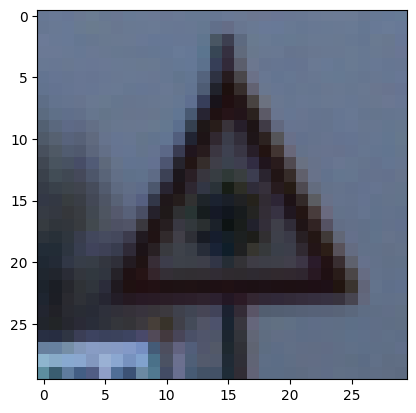





A total of 13 images in the class 2 were incorrectly classified.
The following images should have been classified with the label: 2
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 1


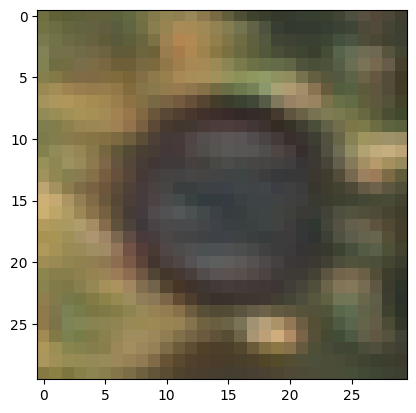



Image was incorrectly classified with the label: 1


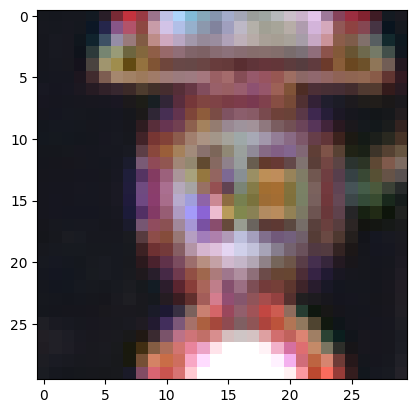



Image was incorrectly classified with the label: 25


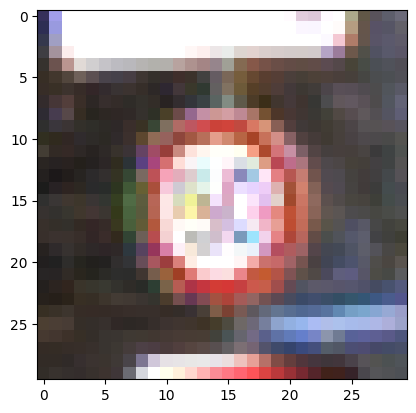



Image was incorrectly classified with the label: 1


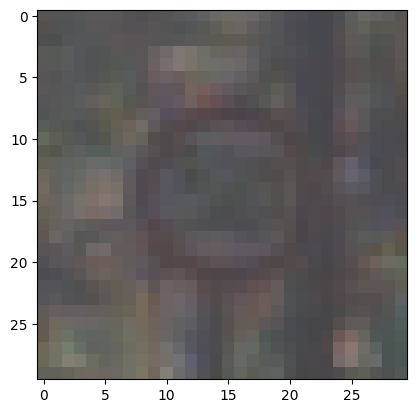



Image was incorrectly classified with the label: 8


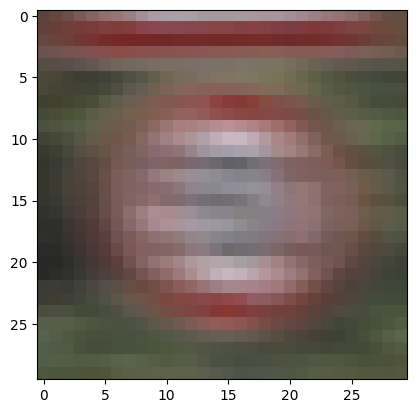



Image was incorrectly classified with the label: 1


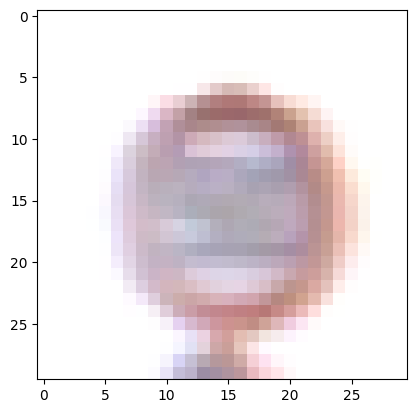



Image was incorrectly classified with the label: 3


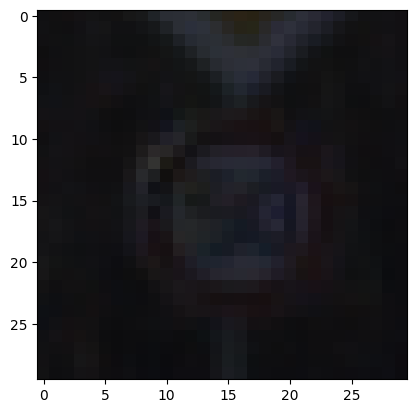



Image was incorrectly classified with the label: 8


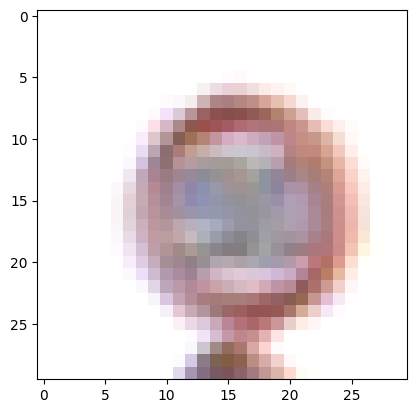



Image was incorrectly classified with the label: 1


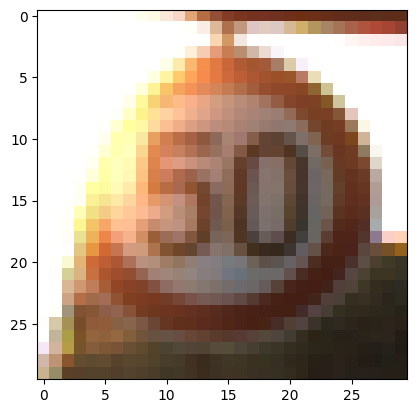



Image was incorrectly classified with the label: 4


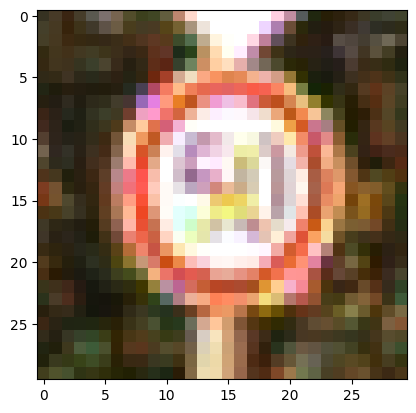



Image was incorrectly classified with the label: 25


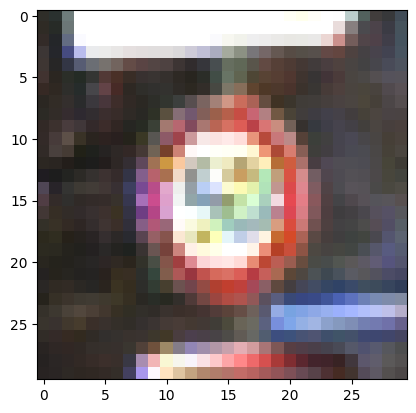



Image was incorrectly classified with the label: 8


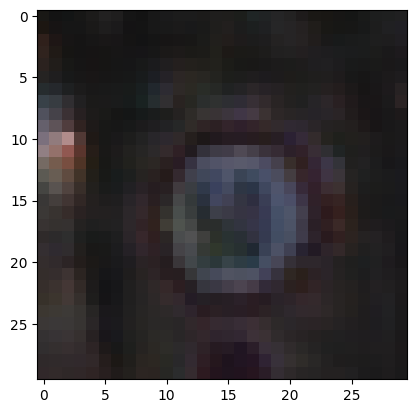



Image was incorrectly classified with the label: 3


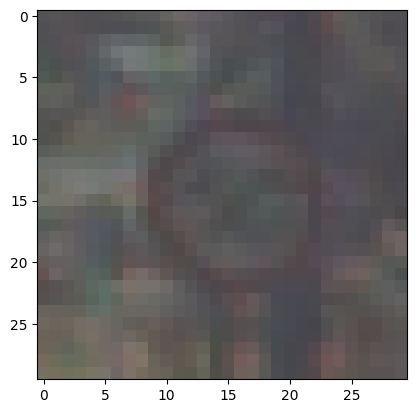





A total of 1 images in the class 37 were incorrectly classified.
The following images should have been classified with the label: 37
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 18


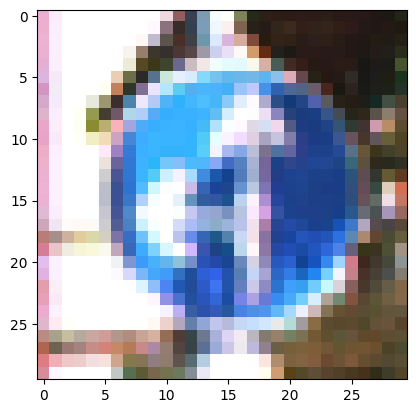





A total of 2 images in the class 9 were incorrectly classified.
The following images should have been classified with the label: 9
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 13


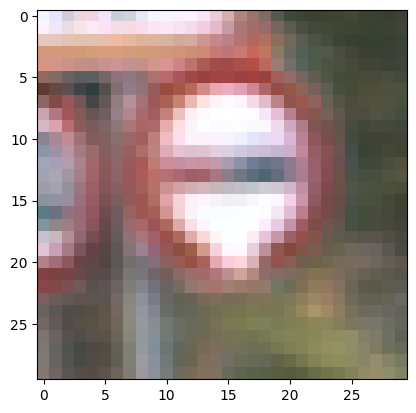



Image was incorrectly classified with the label: 36


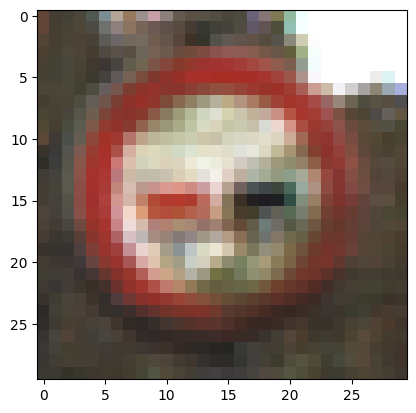





A total of 4 images in the class 29 were incorrectly classified.
The following images should have been classified with the label: 29
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 20


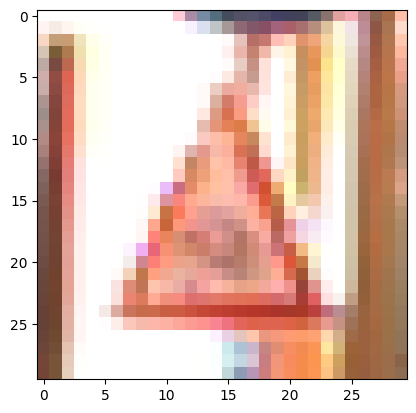



Image was incorrectly classified with the label: 20


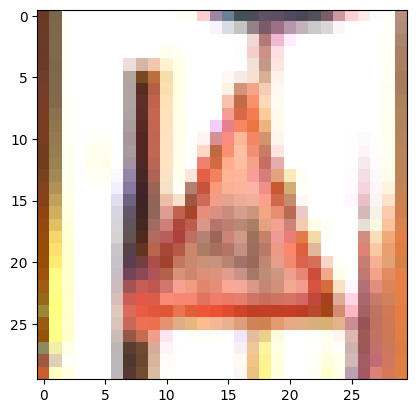



Image was incorrectly classified with the label: 22


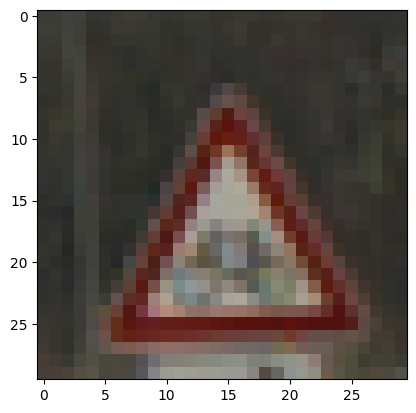



Image was incorrectly classified with the label: 31


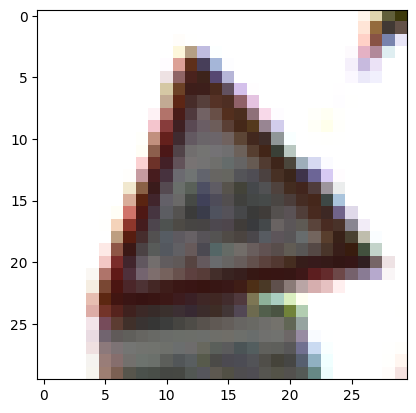





A total of 2 images in the class 20 were incorrectly classified.
The following images should have been classified with the label: 20
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 1


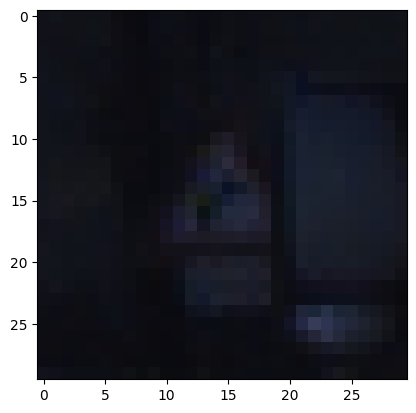



Image was incorrectly classified with the label: 25


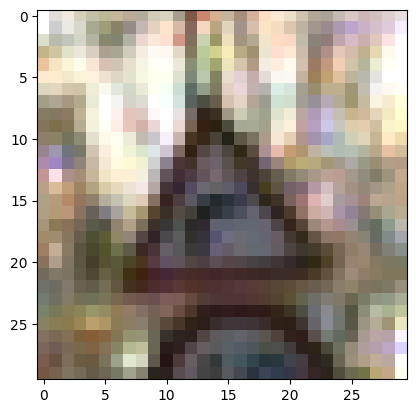





A total of 2 images in the class 3 were incorrectly classified.
The following images should have been classified with the label: 3
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 5


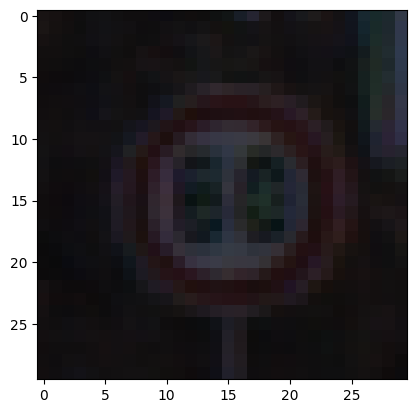



Image was incorrectly classified with the label: 5


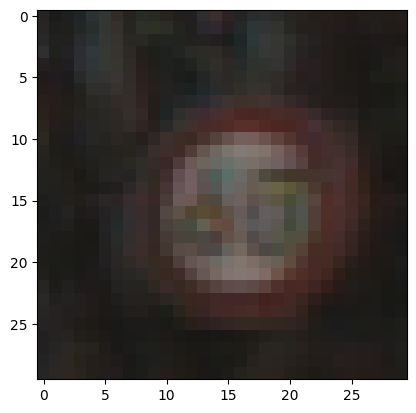





A total of 2 images in the class 26 were incorrectly classified.
The following images should have been classified with the label: 26
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 18


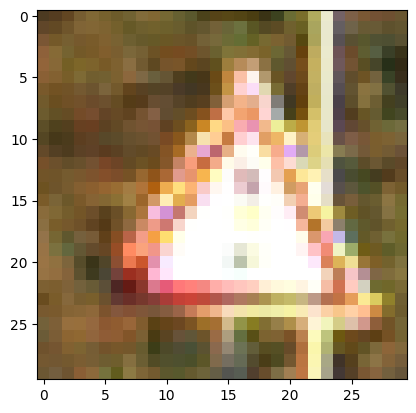



Image was incorrectly classified with the label: 18


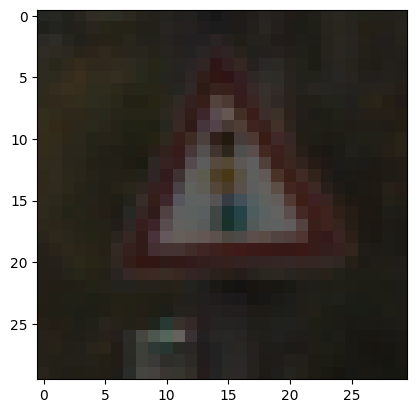





A total of 1 images in the class 0 were incorrectly classified.
The following images should have been classified with the label: 0
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 1


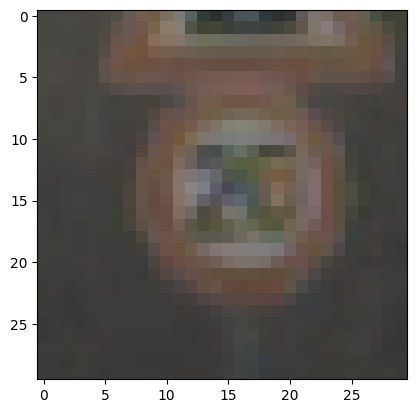





A total of 1 images in the class 25 were incorrectly classified.
The following images should have been classified with the label: 25
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 18


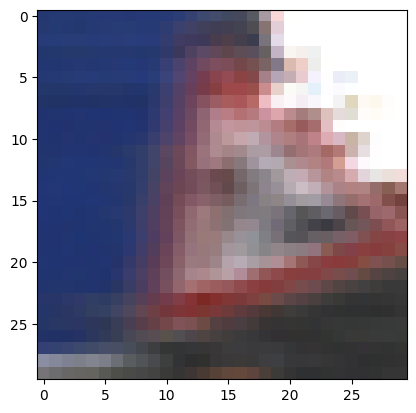





A total of 1 images in the class 23 were incorrectly classified.
The following images should have been classified with the label: 23
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 10


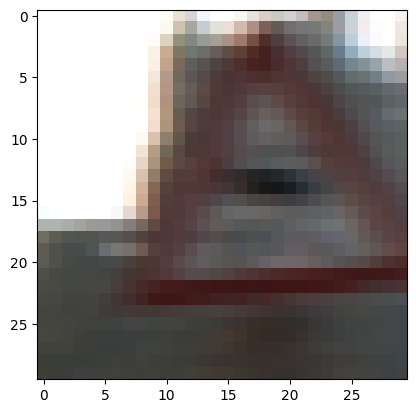





A total of 1 images in the class 31 were incorrectly classified.
The following images should have been classified with the label: 31
-------------------------------------------------------------------------------------------------------------------------------------------
Image was incorrectly classified with the label: 8


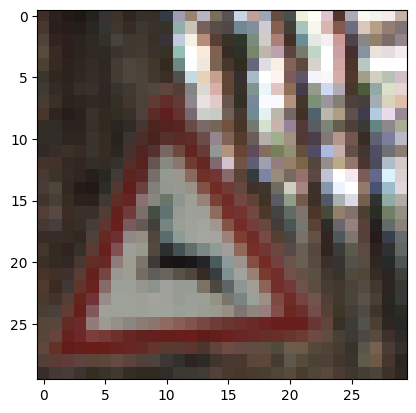

In [ ]:
# custom class to store information about the incorrectly classified image
class MislabeledImage():
  def __init__(self, error_message, image):
    self.error_message = error_message
    self.image = image

  # prints the error message and then displays the image
  def show_info(self):
    print(self.error_message)
    plt.imshow(self.image)
    plt.show()


# identify which images are being incorrectly predicted
# dictionary object to store the incorrectly classified images by label
incorrect_images = {}
for i, image_class in enumerate(y_test_prediction):
  # check to see if an image is incorrectly classified if the predicted label does not match the expected label
  if image_class != y_test_enc[i]:
    # create a new mistlabeled_image object with the current image
    mislabled_image = MislabeledImage(f"Image was incorrectly classified with the label: {image_class}", x_test[i])
    # if the key already exists in the dictionary, then update the list to include this mislabeled_image object
    if y_test_enc[i] in incorrect_images.keys():
      incorrect_images[y_test_enc[i]].append(mislabled_image)
    # if the key does not already exist in the dictionary, then create the key and a list initialized with the current mislabeled_image object
    else:
      incorrect_images.update({y_test_enc[i]: [mislabled_image]})

# show all the incorrectly classified images organized by thier labels
for key in incorrect_images.keys():
  print("A total of", len(incorrect_images[key]), "images in the class", key, "were incorrectly classified.")
  print("The following images should have been classified with the label:", key)
  print("-------------------------------------------------------------------------------------------------------------------------------------------")
  for images in incorrect_images[key]:
    images.show_info()
    print("\n")
  print("\n")


[[ 46   1   0 ...   0   0   0]
 [  0 418   0 ...   0   0   0]
 [  0   5 443 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  51]]


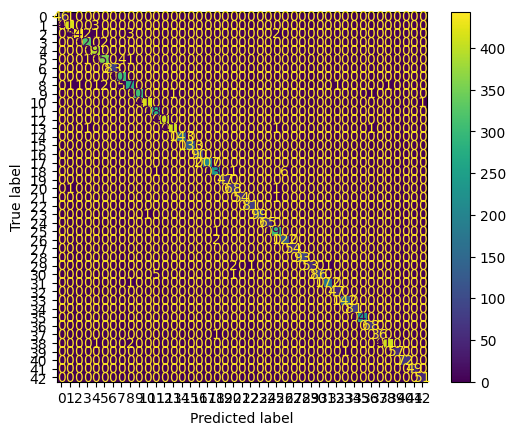

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# create a confusion matrix based on the test data
cm = confusion_matrix(y_test_enc, y_test_prediction)
print(cm)

# display the confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# create a classification report based on the test data
print(classification_report(y_test_enc, y_test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.98      0.99      0.99       421
           2       1.00      0.97      0.98       456
           3       0.99      0.99      0.99       327
           4       0.98      1.00      0.99       394
           5       0.99      0.98      0.99       362
           6       1.00      1.00      1.00        83
           7       0.97      1.00      0.99       307
           8       0.98      0.96      0.97       286
           9       1.00      0.99      1.00       305
          10       1.00      1.00      1.00       420
          11       0.98      1.00      0.99       282
          12       1.00      1.00      1.00       409
          13       1.00      0.99      1.00       414
          14       1.00      1.00      1.00       143
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00        90
          17       1.00    